In [1]:
# import the packages and dependencies 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,10)

pd.options.mode.chained_assignment = None





In [2]:
# Now we need to read in the data
df = pd.read_csv('movies.csv')
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

index - 0%
budget - 0%
genres - 1%
homepage - 64%
id - 0%
keywords - 9%
original_language - 0%
original_title - 0%
overview - 0%
popularity - 0%
production_companies - 0%
production_countries - 0%
release_date - 0%
revenue - 0%
runtime - 0%
spoken_languages - 0%
status - 0%
tagline - 18%
title - 0%
vote_average - 0%
vote_count - 0%
cast - 1%
crew - 0%
director - 1%


In [4]:
# Data Types for our columns

print(df.dtypes)

index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
director                 object
dtype: object


In [5]:
df_columns = df.columns.str.strip()
df_columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

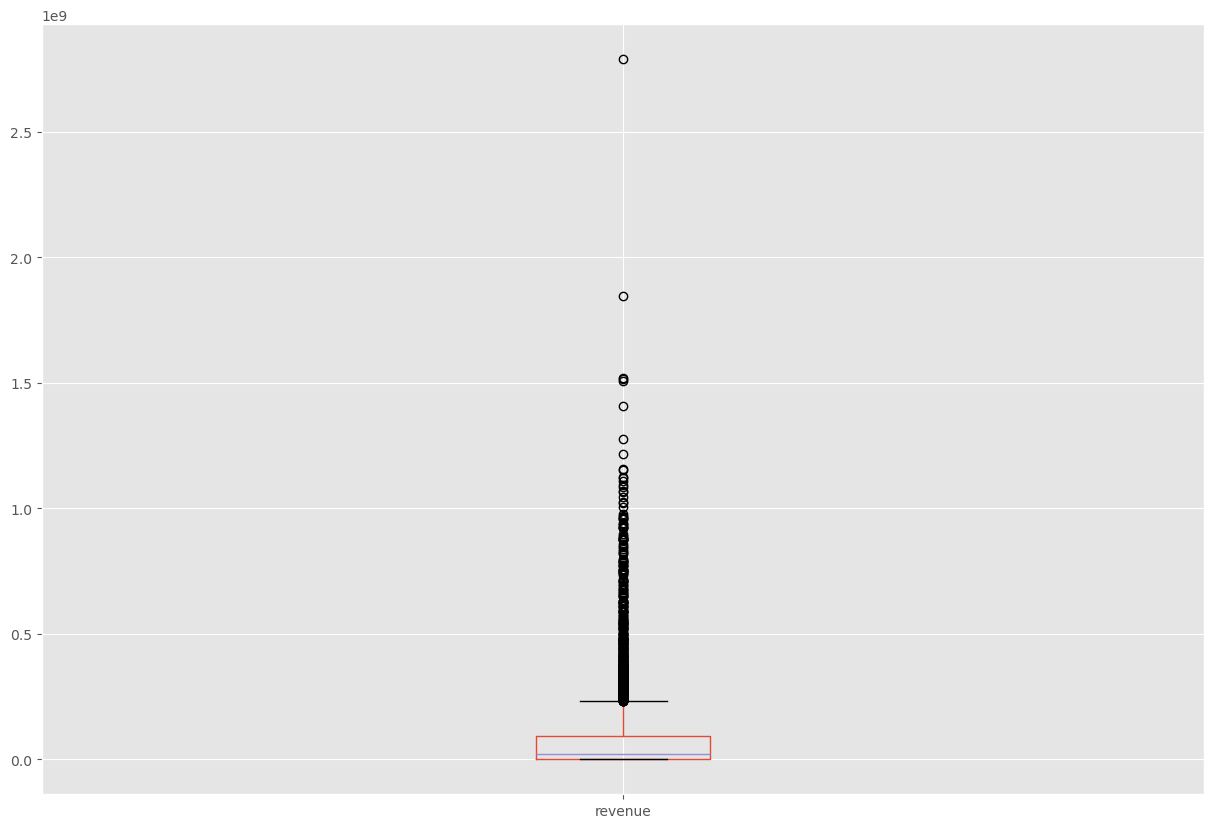

In [6]:
# Are there any Outliers?

df.boxplot(column=['revenue'])
plt.show()

In [7]:
df.drop_duplicates()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [8]:
# Order our Data a little bit to see

df.sort_values(by=['revenue'], inplace=False, ascending=False)


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
25,25,200000000,Drama Romance Thriller,http://www.titanicmovie.com,597,shipwreck iceberg ship panic titanic,en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,...,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,Kate Winslet Leonardo DiCaprio Frances Fisher ...,"[{'name': 'Mali Finn', 'gender': 1, 'departmen...",James Cameron
16,16,220000000,Science Fiction Action Adventure,http://marvel.com/avengers_movie/,24428,new york shield marvel comic superhero based o...,en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,...,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,Robert Downey Jr. Chris Evans Mark Ruffalo Chr...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Joss Whedon
28,28,150000000,Action Adventure Science Fiction Thriller,http://www.jurassicworld.com/,135397,monster dna tyrannosaurus rex velociraptor island,en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,...,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,Chris Pratt Bryce Dallas Howard Irrfan Khan Vi...,"[{'name': 'Steven Spielberg', 'gender': 2, 'de...",Colin Trevorrow
44,44,190000000,Action,http://www.furious7.com/,168259,car race speed revenge suspense car,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,...,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,Vin Diesel Paul Walker Dwayne Johnson Michelle...,"[{'name': 'James Wan', 'gender': 2, 'departmen...",James Wan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,3200,0,Drama Romance,NaN,41248,NaN,fr,La Fille du RER,The Girl on the Train is a 2009 French drama f...,2.351706,...,105.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,The Girl on the Train,5.6,10,Michel Blanc Catherine Deneuve \u00c9milie Deq...,"[{'name': 'Philippe Sarde', 'gender': 2, 'depa...",Andr\u00e9 T\u00e9chin\u00e9
3199,3199,0,Thriller Mystery Crime Drama,NaN,291081,NaN,en,Red Riding: In the Year of Our Lord 1974,"It's Yorkshire in 1974, and fear, mistrust and...",7.247023,...,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"An epic tale of murder, corruption and obsession.",Red Riding: In the Year of Our Lord 1974,7.0,54,Andrew Garfield David Morrissey John Henshaw A...,"[{'name': 'Tony Grisoni', 'gender': 2, 'depart...",Julian Jarrold
3197,3197,6500000,Crime Drama History War,http://www.flammenogcitronen.dk/,8883,assassin copenhagen resistance repayment world...,da,Flammen & Citronen,"During Nazi occupation, red-headed Bent Faursc...",7.028946,...,130.0,"[{""iso_639_1"": ""da"", ""name"": ""Dansk""}, {""iso_6...",Released,NaN,Flame & Citron,6.8,68,Thure Lindhardt Mads Mikkelsen Stine Stengade ...,"[{'name': 'Manon Rasmussen', 'gender': 1, 'dep...",Ole Christian Madsen
3194,3194,9000000,Comedy Drama,NaN,12454,NaN,en,All or Nothing,"Penny's love for her partner, taxi-driver Phil...",2.872281,...,128.0,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,NaN,All or Nothing,7.0,33,James Corden Timothy Spall Ruth Sheen Lesley M...,"[{'name': 'Lesley Wa

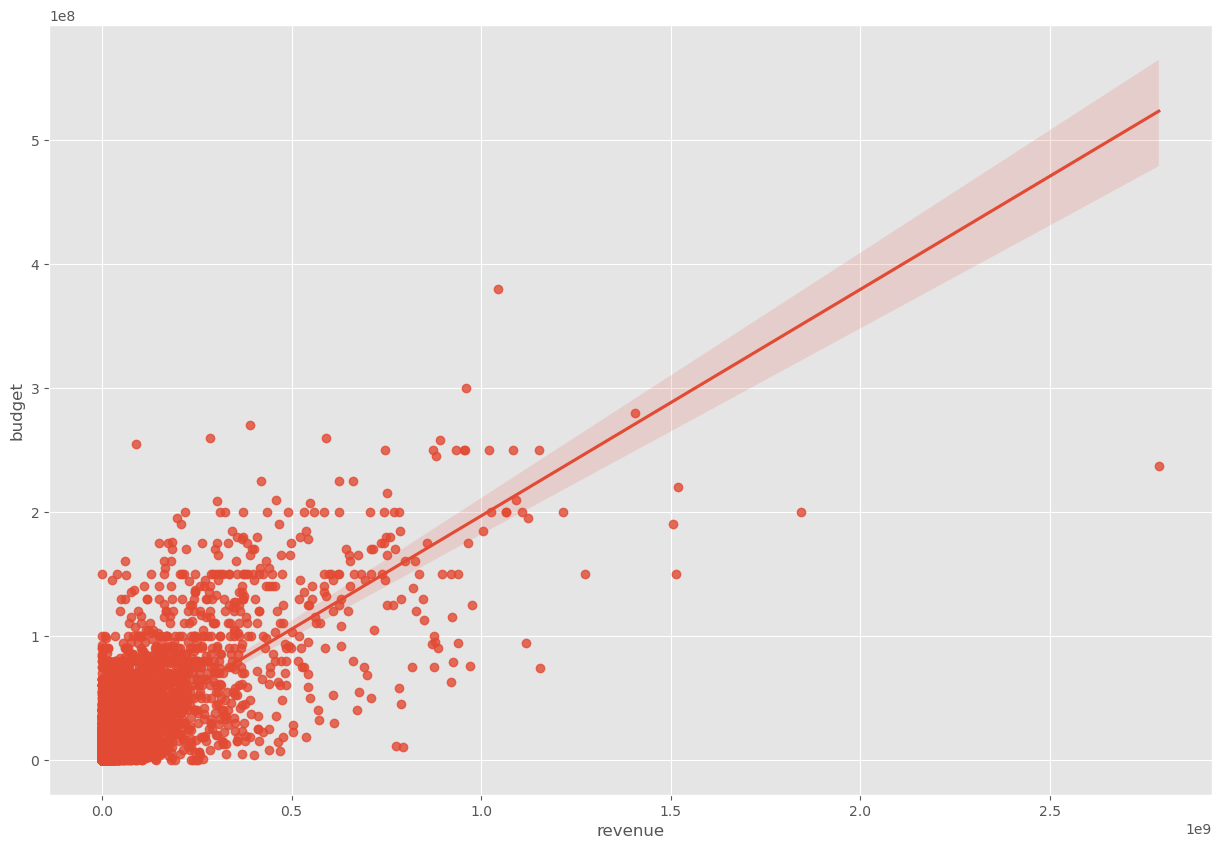

In [9]:
sns.regplot(x="revenue", y="budget", data=df)
plt.show()


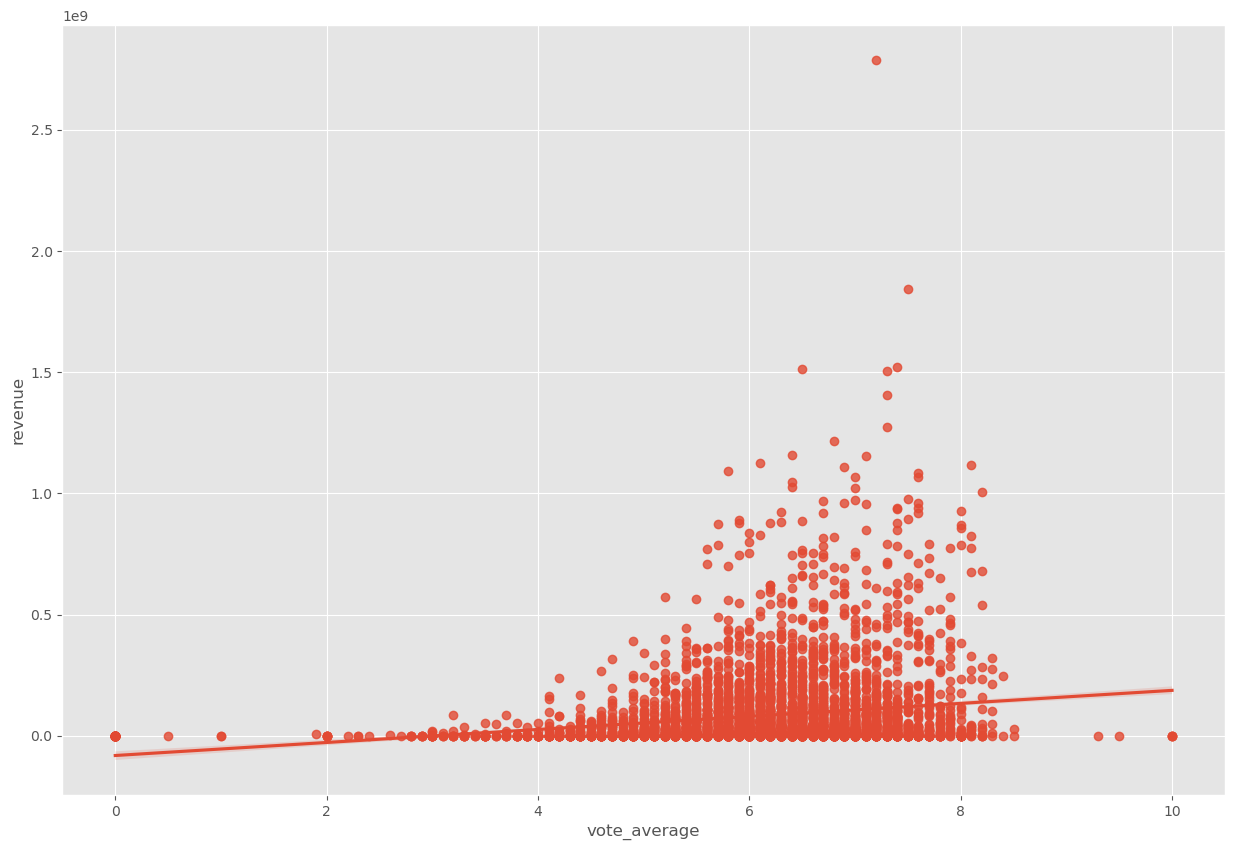

In [10]:
sns.regplot(x="vote_average", y="revenue", data=df)
plt.show()

In [11]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr(method='pearson')
correlation_matrix

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.761579,0.190771,-0.414342,-0.522110,-0.319370,-0.120157,-0.442207
budget,-0.761579,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,0.190771,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,-0.414342,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,-0.522110,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,-0.319370,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,-0.120157,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,-0.442207,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


In [12]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr(method='kendall')
correlation_matrix

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.764650,0.170090,-0.438865,-0.505916,-0.247299,-0.014707,-0.446163
budget,-0.764650,1.000000,-0.169793,0.471529,0.599758,0.230858,0.043600,0.483955
id,0.170090,-0.169793,1.000000,-0.215211,-0.211668,-0.147290,-0.187818,-0.231942
popularity,-0.438865,0.471529,-0.215211,1.000000,0.593304,0.208343,0.254437,0.844488
revenue,-0.505916,0.599758,-0.211668,0.593304,1.000000,0.225542,0.171562,0.622417
runtime,-0.247299,0.230858,-0.147290,0.208343,0.225542,1.000000,0.282920,0.209788
vote_average,-0.014707,0.043600,-0.187818,0.254437,0.171562,0.282920,1.000000,0.270985
vote_count,-0.446163,0.483955,-0.231942,0.844488,0.622417,0.209788,0.270985,1.000000


In [13]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr(method='spearman')
correlation_matrix

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.852392,0.244203,-0.609529,-0.671577,-0.356598,-0.022125,-0.619268
budget,-0.852392,1.000000,-0.246105,0.649466,0.756841,0.326120,0.066183,0.663368
id,0.244203,-0.246105,1.000000,-0.277905,-0.292255,-0.215512,-0.266219,-0.296946
popularity,-0.609529,0.649466,-0.277905,1.000000,0.776679,0.302288,0.359288,0.959807
revenue,-0.671577,0.756841,-0.292255,0.776679,1.000000,0.317239,0.243457,0.804056
runtime,-0.356598,0.326120,-0.215512,0.302288,0.317239,1.000000,0.397883,0.304125
vote_average,-0.022125,0.066183,-0.266219,0.359288,0.243457,0.397883,1.000000,0.381283
vote_count,-0.619268,0.663368,-0.296946,0.959807,0.804056,0.304125,0.381283,1.000000


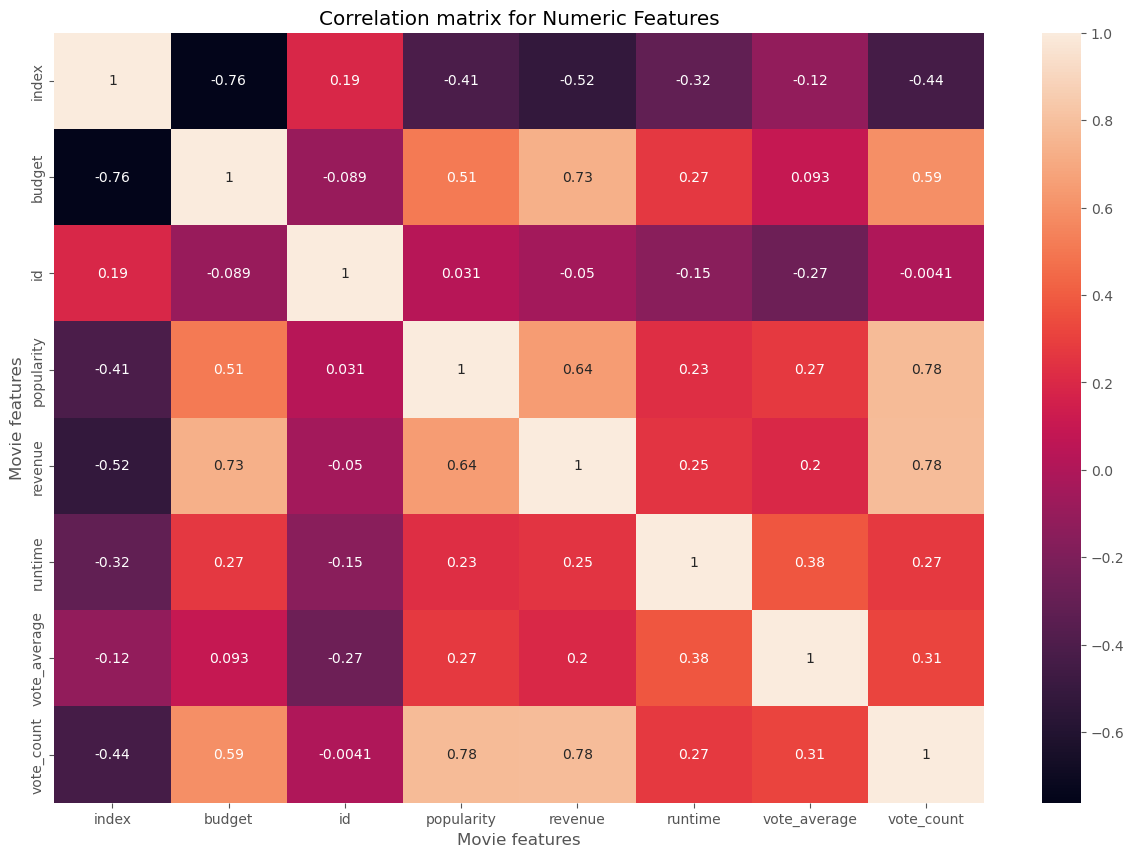

In [14]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()


In [15]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
index,1.000000,0.453524,0.313615,0.233852,1.000000,0.707900,0.151696,0.999542,0.997627,0.999937,...,0.219447,0.141501,0.055586,0.530328,0.999346,0.168901,0.485741,0.953583,0.999097,0.784284
budget,0.453524,1.000000,0.157042,0.161388,0.453524,0.455921,0.071657,0.452434,0.450280,0.453719,...,0.071081,0.080020,0.005672,0.408325,0.452176,-0.008331,0.250964,0.457308,0.456540,0.305136
genres,0.313615,0.157042,1.000000,0.091626,0.313615,0.256943,0.038291,0.312518,0.312301,0.313574,...,0.088954,0.055495,-0.005290,0.214756,0.311929,0.044964,0.224526,0.307636,0.316252,0.250373
homepage,0.233852,0.161388,0.091626,1.000000,0.233852,0.223129,0.076580,0.234154,0.234741,0.233982,...,0.039376,0.054383,0.011997,0.186244,0.233659,-0.004156,0.144349,0.239500,0.235530,0.198197
id,1.000000,0.453524,0.313615,0.233852,1.000000,0.707900,0.151696,0.999542,0.997627,0.999937,...,0.219447,0.141501,0.055586,0.530328,0.999346,0.168901,0.485741,0.953583,0.999097,0.784284
keywords,0.707900,0.455921,0.256943,0.223129,0.707900,1.000000,0.111646,0.707377,0.707474,0.707795,...,0.082991,0.109085,0.002625,0.548399,0.707136,-0.030398,0.377710,0.732749,0.715026,0.508027
original_language,0.151696,0.071657,0.038291,0.076580,0.151696,0.111646,1.000000,0.151778,0.149043,0.151736,...,-0.005668,0.459855,0.014192,0.013595,0.150962,0.000270,0.048875,0.155221,0.152689,0.156792
original_title,0.999542,0.452434,0.312518,0.234154,0.999542,0.707377,0.151778,1.000000,0.997169,0.999479,...,0.219229,0.141727,0.055592,0.529763,0.999803,0.169348,0.486096,0.953122,0.998638,0.783578
overview,0.997627,0.450280,0.312301,0.234741,0.997627,0.707474,0.149043,0.997169,1.000000,0.997564,...,0.220302,0.140591,0.055599,0.532245,0.996973,0.167911,0.483850,0.953326,0.996718,0.781331
popularity,0.999937,0.453719,0.313574,0.233982,0.999937,0.707795,0.151736,0.999479,0.997564,1.000000,...,0.219435,0.141601,0.055586,0.530189,0.999283,0.169074,0.485902,0.953518,0.999035,0.784471


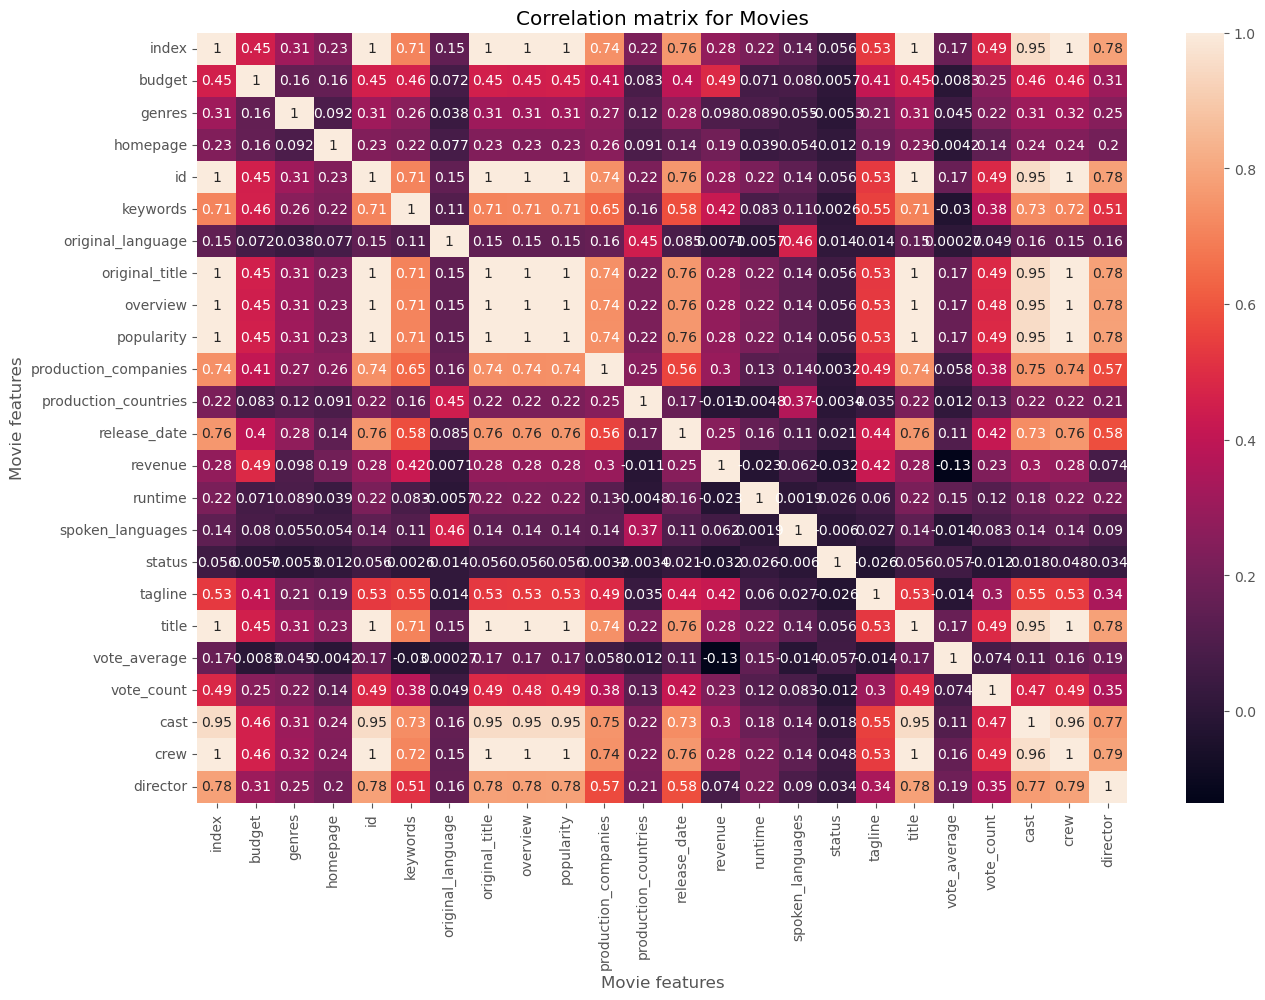

In [16]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [17]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

index     index           1.000000
          budget          0.453524
          genres          0.313615
          homepage        0.233852
          id              1.000000
                            ...   
director  vote_average    0.187732
          vote_count      0.348689
          cast            0.769878
          crew            0.790455
          director        1.000000
Length: 576, dtype: float64


In [18]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

revenue               vote_average           -0.134804
vote_average          revenue                -0.134804
revenue               status                 -0.031882
status                revenue                -0.031882
vote_average          keywords               -0.030398
                                                ...   
title                 title                   1.000000
vote_average          vote_average            1.000000
vote_count            vote_count              1.000000
production_companies  production_companies    1.000000
director              director                1.000000
Length: 576, dtype: float64


In [19]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

keywords              director                0.508027
director              keywords                0.508027
title                 tagline                 0.529501
tagline               title                   0.529501
original_title        tagline                 0.529763
                                                ...   
title                 title                   1.000000
vote_average          vote_average            1.000000
vote_count            vote_count              1.000000
production_companies  production_companies    1.000000
director              director                1.000000
Length: 174, dtype: float64


In [20]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('production_companies')[["revenue"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('revenue', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['revenue'].astype('int64') 

CompanyGrossSumSorted

production_companies
[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Pixar Animation Studios", "id": 3}]                                                                                                                      6742125408
[{"name": "DreamWorks Animation", "id": 521}]                                                                                                                                                                  5678788108
[{"name": "Paramount Pictures", "id": 4}]                                                                                                                                                                      5208165717
[{"name": "Marvel Studios", "id": 420}]                                                                                                                                                                        5123093878
[{"name": "Blue Sky Studios", "id": 9383}, {"name": "Twentieth Century Fox Animation", "id": 11749}]       

In [21]:
df['year'] = df['release_date'].astype(str).str[:4]
df.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,year
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,2009
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,2007
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,2015


In [22]:
#df = df.drop('Year', axis=1)  # Drop the 'Year' column


In [23]:

df.groupby(['production_companies', 'year'])[["revenue"]].sum()

revenue
production_companies                               year          
[]                                                 1969  27000000
                                                   1970         0
                                                   1974         0
                                                   1978         0
                                                   1979         0
...                                                           ...
[{"name": "area japan", "id": 6536}]               2008    317000
[{"name": "i5 Films", "id": 26927}, {"name": "H... 2001         0
[{"name": "icon", "id": 4096}]                     2003   3031801
[{"name": "kNow Productions", "id": 14911}]        2015         0
[{"name": "rusty bear entertainment", "id": 879... 2005         0

[4312 rows x 1 columns]

In [24]:

CompanyGrossSum = df.groupby(['production_companies', 'year'])[["revenue"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['revenue','production_companies','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['revenue'].astype('int64') 

CompanyGrossSumSorted

production_companies                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    year
[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]                                                                                                                                                                                                                                                                                             2009    2787965087


In [25]:

CompanyGrossSum = df.groupby(['production_companies'])[["revenue"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['revenue','production_companies'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['revenue'].astype('int64') 

CompanyGrossSumSorted

production_companies
[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Pixar Animation Studios", "id": 3}]                                                                                                                      6742125408
[{"name": "DreamWorks Animation", "id": 521}]                                                                                                                                                                  5678788108
[{"name": "Paramount Pictures", "id": 4}]                                                                                                                                                                      5208165717
[{"name": "Marvel Studios", "id": 420}]                                                                                                                                                                        5123093878
[{"name": "Blue Sky Studios", "id": 9383}, {"name": "Twentieth Century Fox Animation", "id": 11749}]       

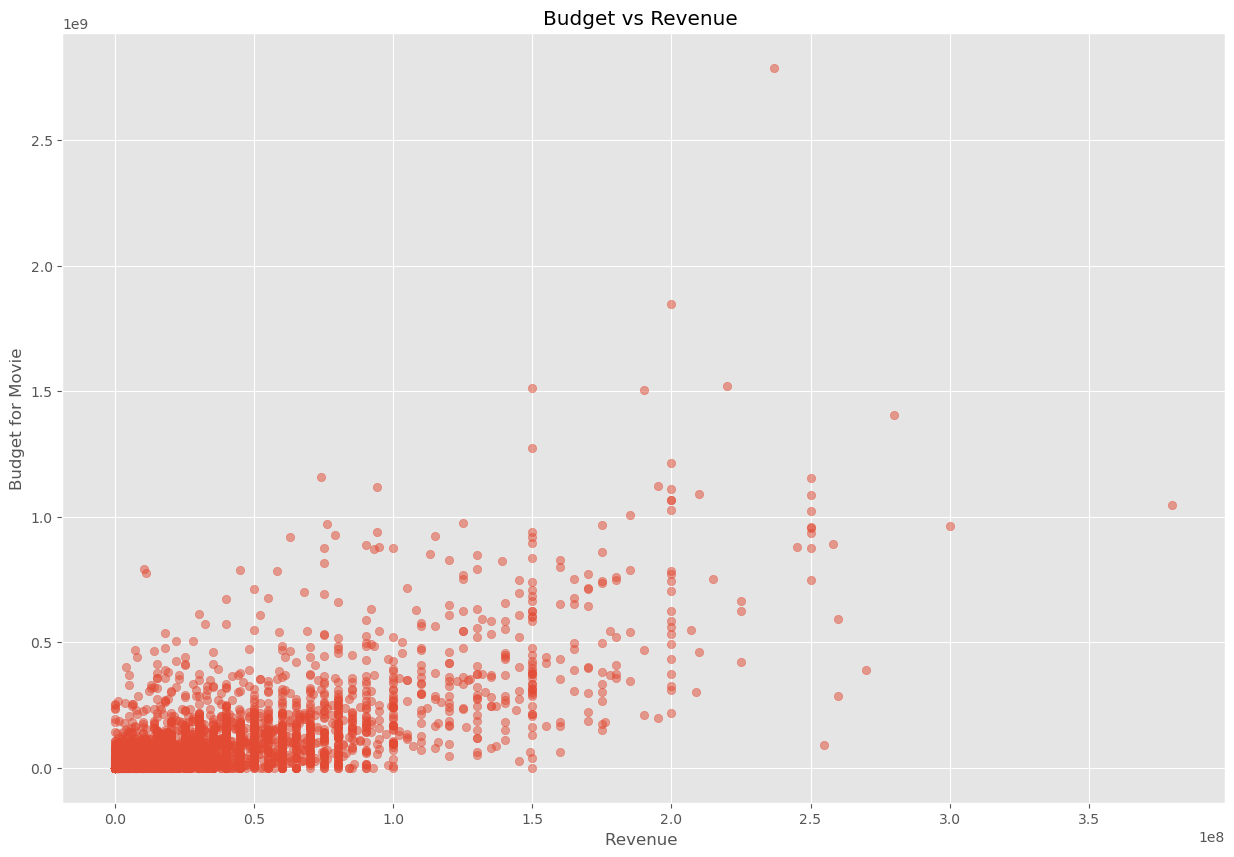

In [26]:
plt.scatter(x=df['budget'], y=df['revenue'], alpha=0.5)
plt.title('Budget vs Revenue ')
plt.xlabel('Revenue ')
plt.ylabel('Budget for Movie')
plt.show()

In [27]:
df_columns = df.columns.str.strip()
df_columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director', 'year'],
      dtype='object')

In [28]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,year
0,0,237000000,59,461,19995,1025,7,372,2524,150.437577,...,179,1,732,379,7.2,11800,3972,4133,887,81
1,1,300000000,327,56,285,2748,7,2665,1662,139.082615,...,383,1,414,2648,6.9,4500,2292,1010,771,79
2,2,245000000,29,1281,206647,3636,7,3188,213,107.376788,...,403,1,97,3181,6.3,4466,966,4447,1971,87
3,3,250000000,130,1378,49026,1077,7,3594,2076,112.312950,...,383,1,2688,3612,7.6,9106,800,1762,361,84
4,4,260000000,71,217,49529,365,7,1891,2794,43.926995,...,383,1,1824,1901,6.1,2124,4329,196,96,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,136,-1,9367,3946,8,1138,1951,14.269792,...,393,1,1137,1145,6.6,238,645,3792,1895,64
4799,4799,9000,522,-1,72766,-1,7,2463,543,0.642552,...,0,1,202,2442,5.9,5,1245,1369,605,83
4800,4800,0,477,760,231617,1072,7,3081,7,1.444476,...,383,1,-1,3072,7.0,6,1343,655,1997,85
4801,4801,0,-1,282,126186,-1,7,3034,4556,0.857008,...,383,1,93,3021,5.7,7,978,955,439,84


In [29]:
df_numerized.corr(method='pearson')

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,year
index,1.000000,-0.761579,0.207785,-0.133909,0.190771,-0.065607,0.059620,-0.034180,-0.056192,-0.414342,...,-0.032639,0.024738,-0.220332,-0.028889,-0.120157,-0.442207,-0.020014,0.001425,-0.029753,-0.159143
budget,-0.761579,1.000000,-0.207834,0.185716,-0.089377,0.061423,-0.063656,0.031296,0.068220,0.505414,...,0.013335,-0.007760,0.169009,0.034438,0.093146,0.593180,0.004979,-0.035474,0.006674,0.169101
genres,0.207785,-0.207834,1.000000,-0.004530,0.088353,0.002360,-0.008809,-0.000366,-0.057333,-0.062793,...,0.047309,-0.016608,-0.018456,0.008185,0.051051,-0.092298,0.010368,0.027534,0.017113,0.020098
homepage,-0.133909,0.185716,-0.004530,1.000000,0.055859,0.023018,-0.024141,0.133836,0.014053,0.184900,...,-0.002451,-0.028900,0.034273,0.144662,0.077750,0.220009,0.034734,-0.013909,-0.001645,0.244942
id,0.190771,-0.089377,0.088353,0.055859,1.000000,-0.116534,0.065028,-0.002284,-0.039694,0.031202,...,0.023289,-0.030001,-0.106799,-0.011669,-0.270595,-0.004128,-0.046982,0.000314,-0.043029,0.436807
keywords,-0.065607,0.061423,0.002360,0.023018,-0.116534,1.000000,-0.012741,-0.000531,0.023350,0.059138,...,0.039881,0.004590,0.074815,-0.001266,0.097607,0.056896,0.000100,-0.004585,0.011804,-0.069073
original_language,0.059620,-0.063656,-0.008809,-0.024141,0.065028,-0.012741,1.000000,0.114509,-0.015298,-0.054647,...,0.119405,0.004995,-0.078397,-0.008530,0.037147,-0.059301,0.002572,0.045075,0.013695,0.044824
original_title,-0.034180,0.031296,-0.000366,0.133836,-0.002284,-0.000531,0.114509,1.000000,0.016788,0.001108,...,0.033947,0.023882,0.022809,0.934650,0.024664,0.017060,-0.013620,0.004911,0.003436,0.007742
overview,-0.056192,0.068220,-0.057333,0.014053,-0.039694,0.023350,-0.015298,0.016788,1.000000,0.042328,...,-0.002618,-0.004563,0.027157,0.020365,0.006102,0.044630,0.025413,0.002973,-0.004173,-0.001189
popularity,-0.414342,0.505414,-0.062793,0.184900,0.031202,0.059138,-0.054647,0.001108,0.042328,1.000000,...,0.037549,-0.007365,0.143263,0.002025,0.273952,0.778130,0.008477,-0.018857,-0.008645,0.102060


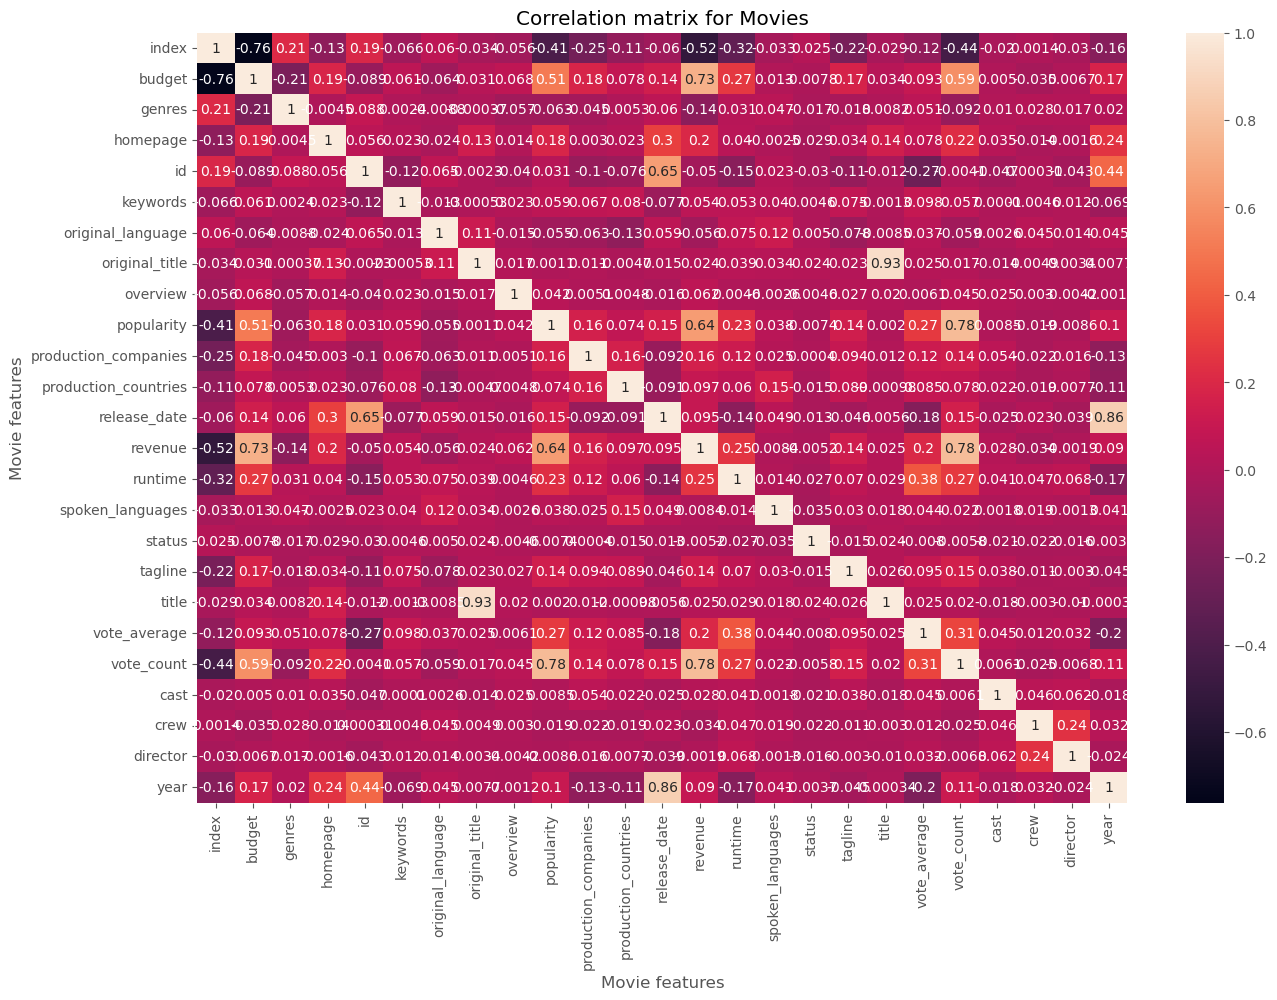

In [30]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [31]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [32]:
# Identify categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns to categorical type
df[cat_columns] = df[cat_columns].astype('category')

# Encode categorical columns using category codes
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# Display updated DataFrame
df.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,year
0,0,237000000,59,461,19995,1025,7,372,2524,150.437577,...,179,1,732,379,7.2,11800,3972,4133,887,81
1,1,300000000,327,56,285,2748,7,2665,1662,139.082615,...,383,1,414,2648,6.9,4500,2292,1010,771,79
2,2,245000000,29,1281,206647,3636,7,3188,213,107.376788,...,403,1,97,3181,6.3,4466,966,4447,1971,87
3,3,250000000,130,1378,49026,1077,7,3594,2076,112.312950,...,383,1,2688,3612,7.6,9106,800,1762,361,84
4,4,260000000,71,217,49529,365,7,1891,2794,43.926995,...,383,1,1824,1901,6.1,2124,4329,196,96,84


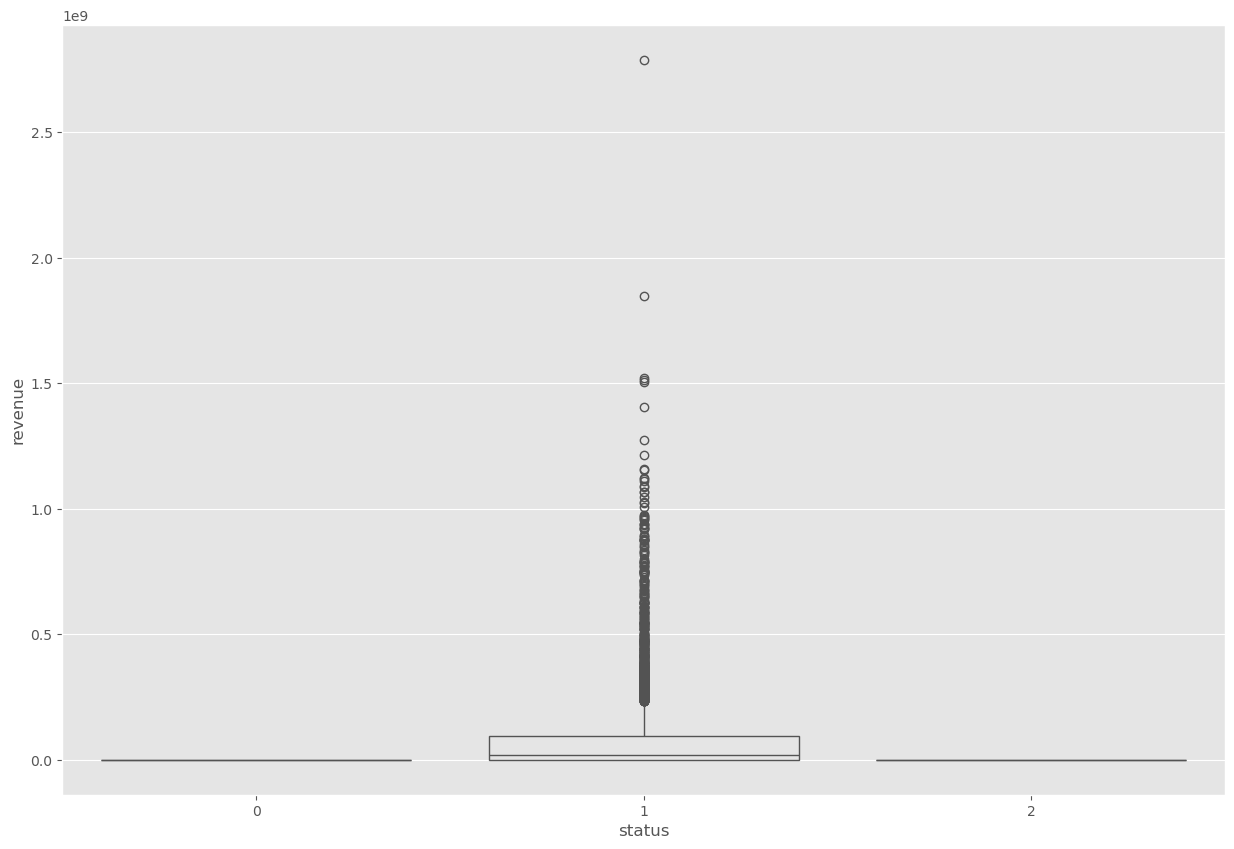

In [34]:
sns.boxplot(x="status", y="revenue", data=df, showcaps=False, boxprops={'facecolor':'None'})
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


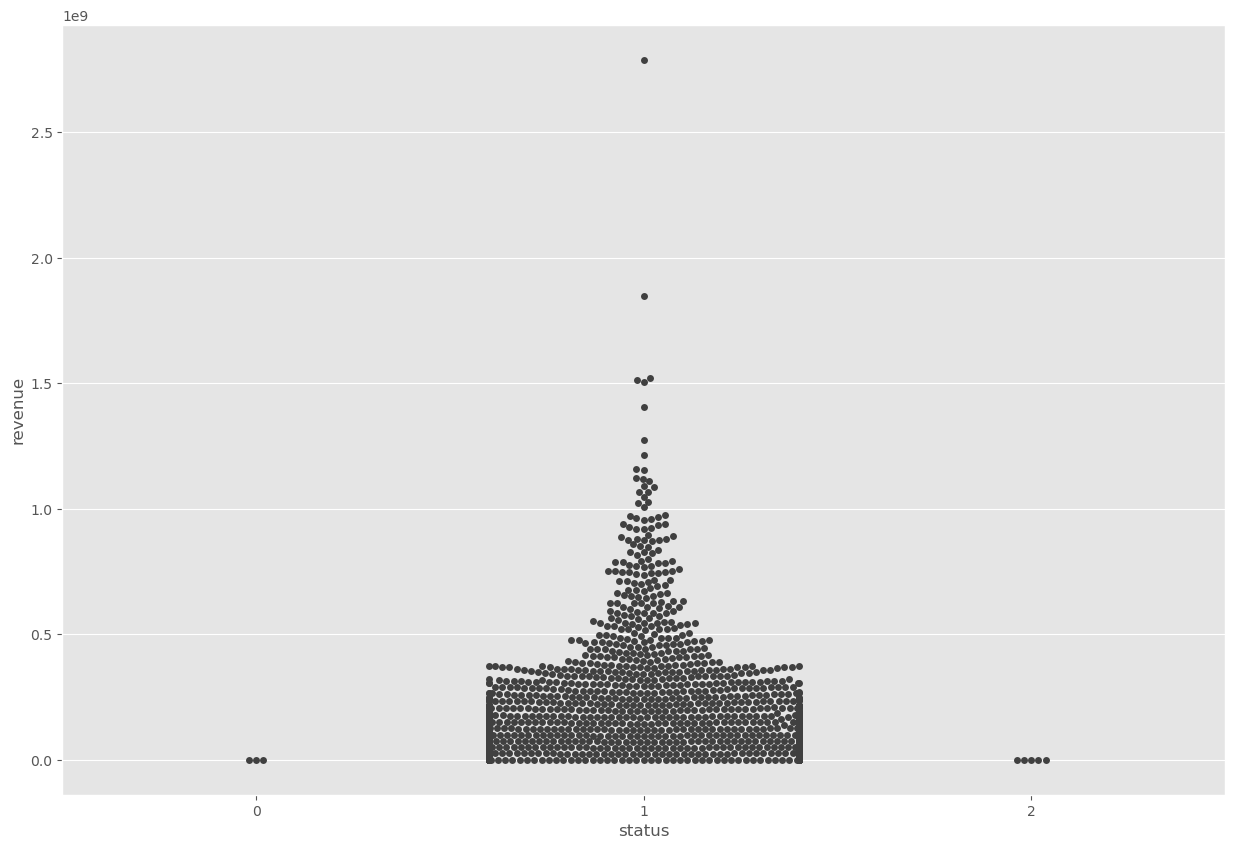

In [36]:
sns.swarmplot(x="status", y="revenue", data=df, color=".25")
plt.show()

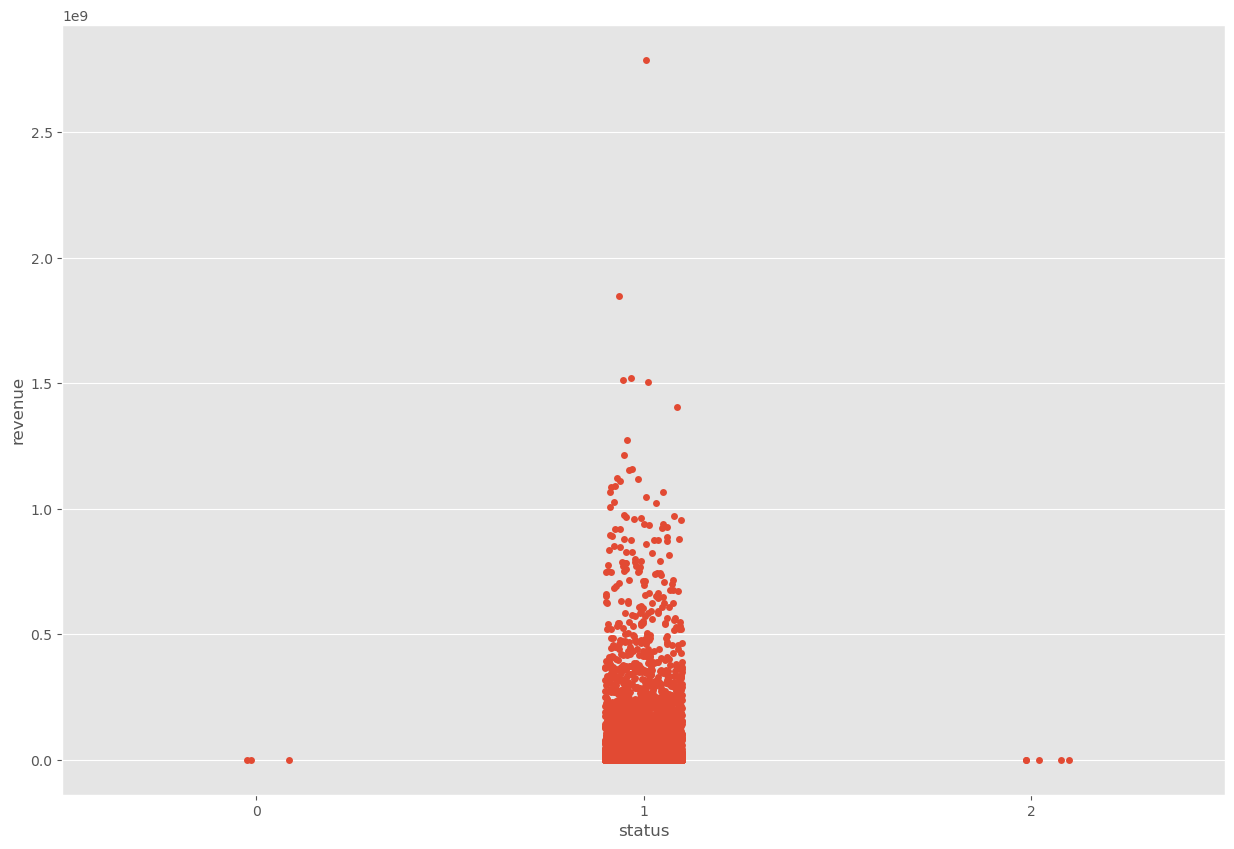

In [33]:
sns.stripplot(x="status", y="revenue", data=df)
plt.show()